# Telecom Customer Churn
This dataset comes from an Iranian telecom company, with each row representing a customer over a year period. Along with a churn label, there is information on the customers' activity, such as call failures and subscription length. 

Not sure where to begin? Scroll to the bottom to find challenges!

## Data Dictionary
| Column                  | Explanation                                             |
|-------------------------|---------------------------------------------------------|
| Call Failure            | number of call failures                                 |
| Complaints              | binary (0: No complaint, 1: complaint)                  |
| Subscription Length     | total months of subscription                            |
| Charge Amount           | ordinal attribute (0: lowest amount, 9: highest amount) |
| Seconds of Use          | total seconds of calls                                  |
| Frequency of use        | total number of calls                                   |
| Frequency of SMS        | total number of text messages                           |
| Distinct Called Numbers | total number of distinct phone calls                    |
| Age Group               | ordinal attribute (1: younger age, 5: older age)        |
| Tariff Plan             | binary (1: Pay as you go, 2: contractual)               |
| Status                  | binary (1: active, 2: non-active)                       |
| Age                     | age of customer                                         |
| Customer Value          | the calculated value of customer                        |
| Churn                   | class label (1: churn, 0: non-churn)                    |

[Source](https://www.kaggle.com/royjafari/customer-churn)  of dataset and [source](https://archive.ics.uci.edu/ml/datasets/Iranian+Churn+Dataset) of dataset description. 

**Citation**: Jafari-Marandi, R., Denton, J., Idris, A., Smith, B. K., & Keramati, A. (2020). Optimum Profit-Driven Churn Decision Making: Innovative Artificial Neural Networks in Telecom Industry. Neural Computing and Applications.

# Step 1: Load and Explore Data

In [4]:
import pandas as pd
df = pd.read_csv("data/customer_churn.csv")
print(churn.shape)


(3150, 14)


In [5]:
df.head()

,Call Failure,Complaints,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call Failure             3150 non-null   int64  
 1   Complaints               3150 non-null   int64  
 2   Subscription Length      3150 non-null   int64  
 3   Charge Amount            3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(13)

In [7]:
df.describe()

,Call Failure,Complaints,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,7.627937,0.076508,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,2.826032,1.077778,1.248254,30.998413,470.972916,0.157143
std,7.263886,0.265851,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,0.892555,0.267864,0.432069,8.831095,517.015433,0.363993
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,0.000000,0.000000
25%,1.000000,0.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,2.000000,1.000000,1.000000,25.000000,113.801250,0.000000
50%,6.000000,0.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,3.000000,1.000000,1.000000,30.000000,228.480000,0.000000
75%,12.000000,0.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,3.000000,1.000000,1.000000,30.000000,788.388750,0.000000
max,36.000000,1.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,5.000000,2.000000,2.000000,55.000000,2165.280000,1.000000


#  Step 2: Exploratory Data Analysis (EDA)

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

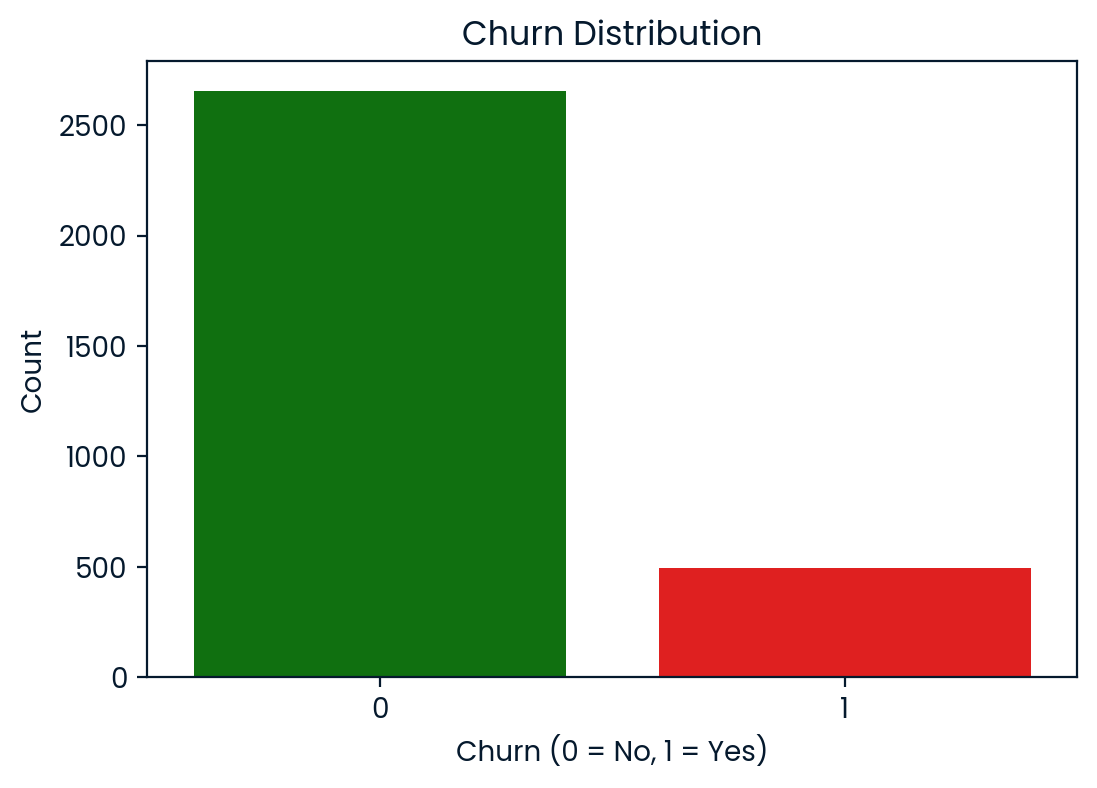

In [9]:
plt.figure(figsize=(6,4))
sns.countplot(x=df["Churn"], palette=["green", "red"])
plt.title("Churn Distribution")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

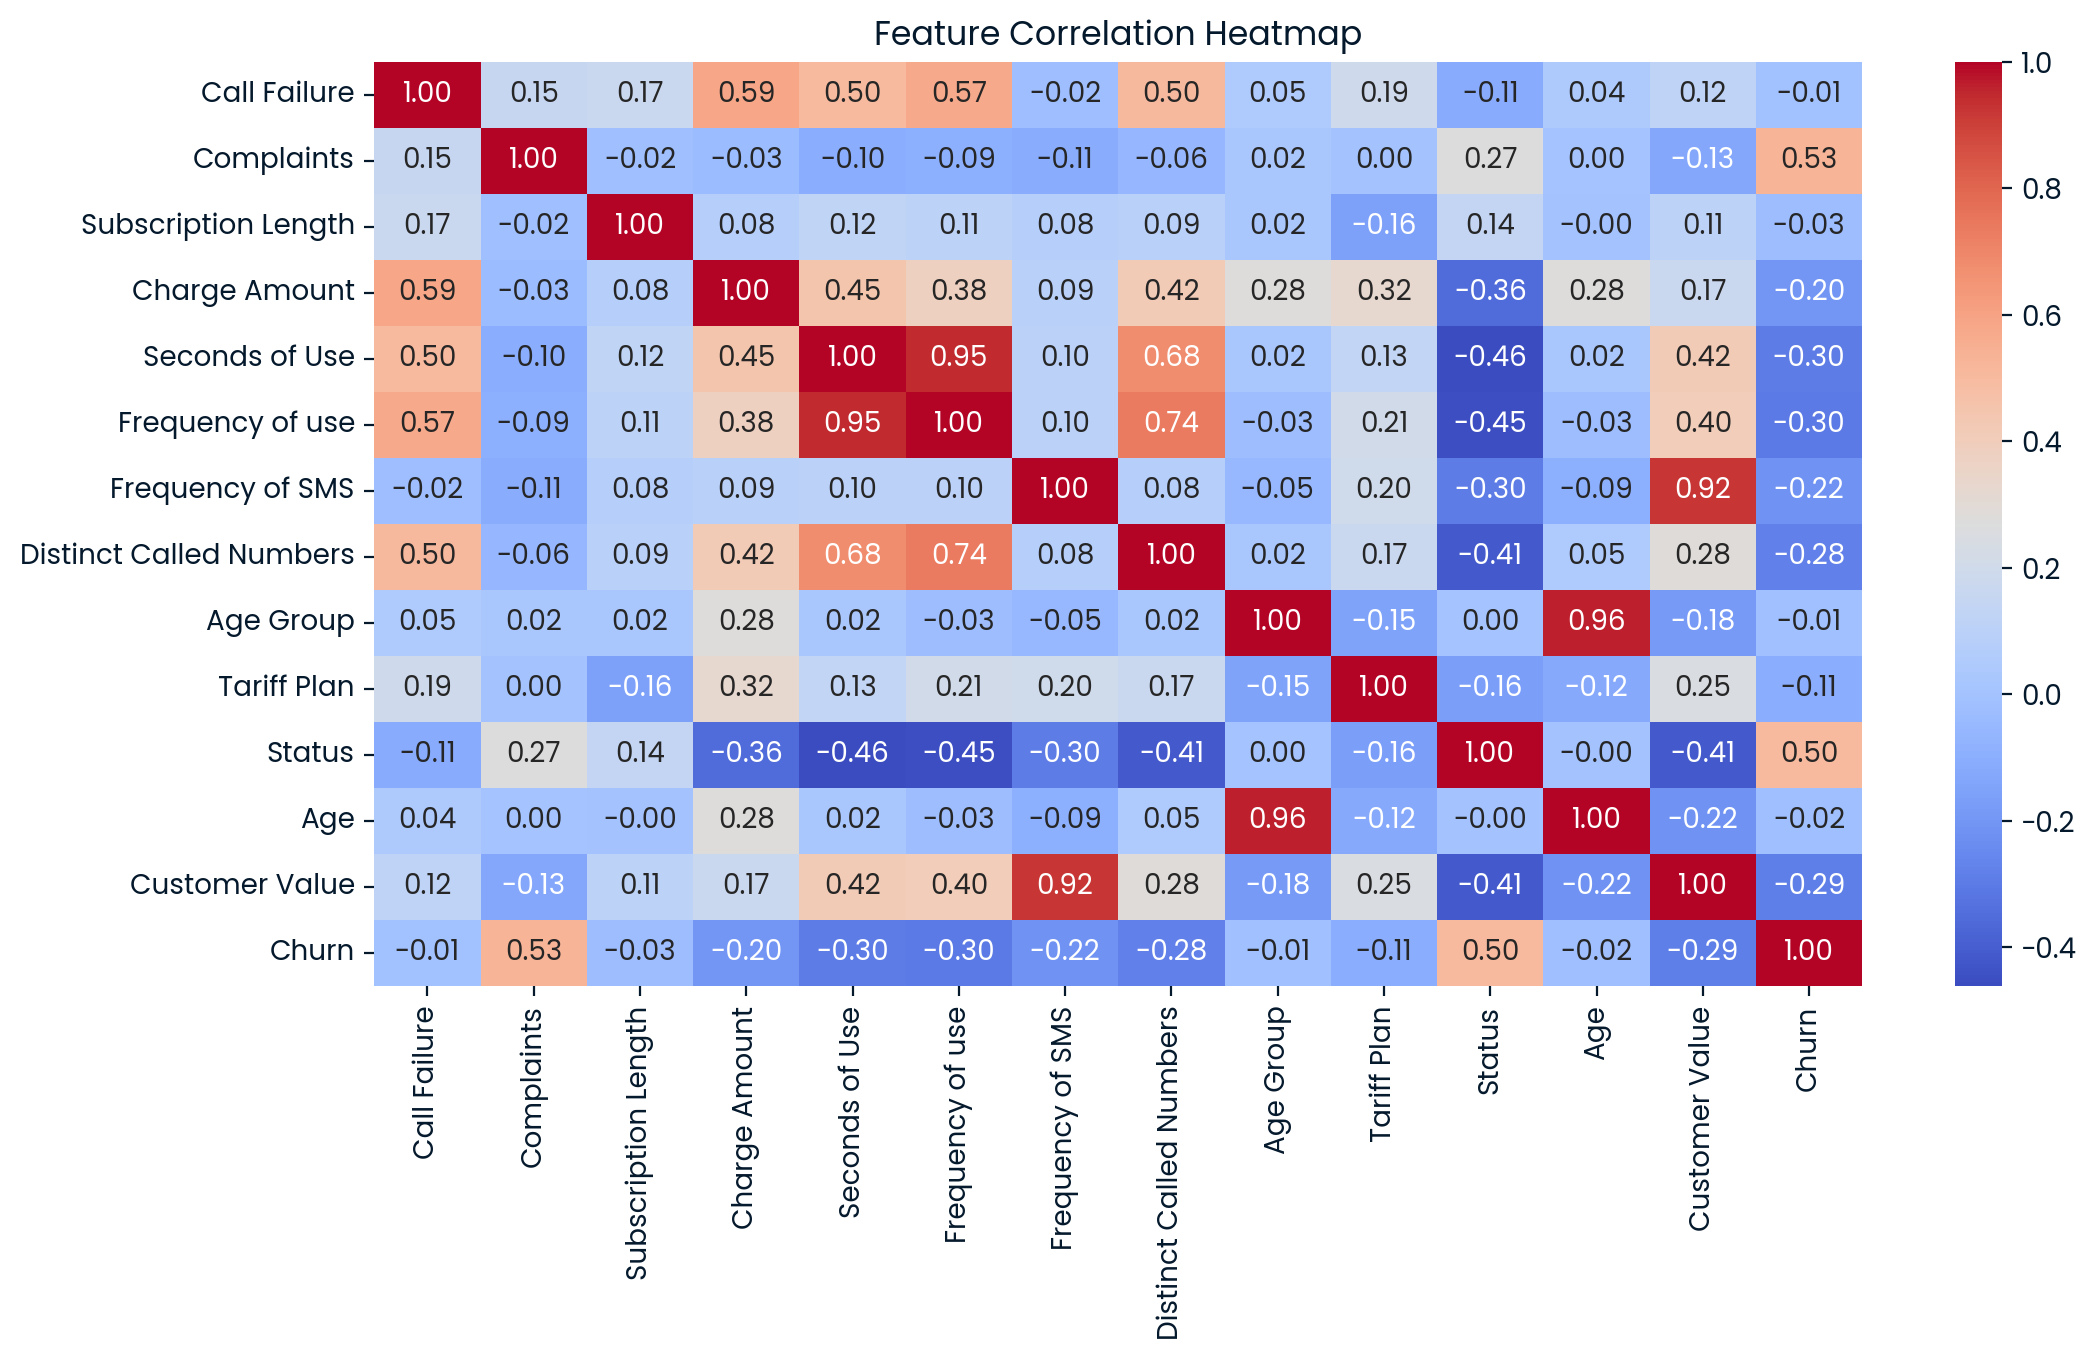

In [10]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

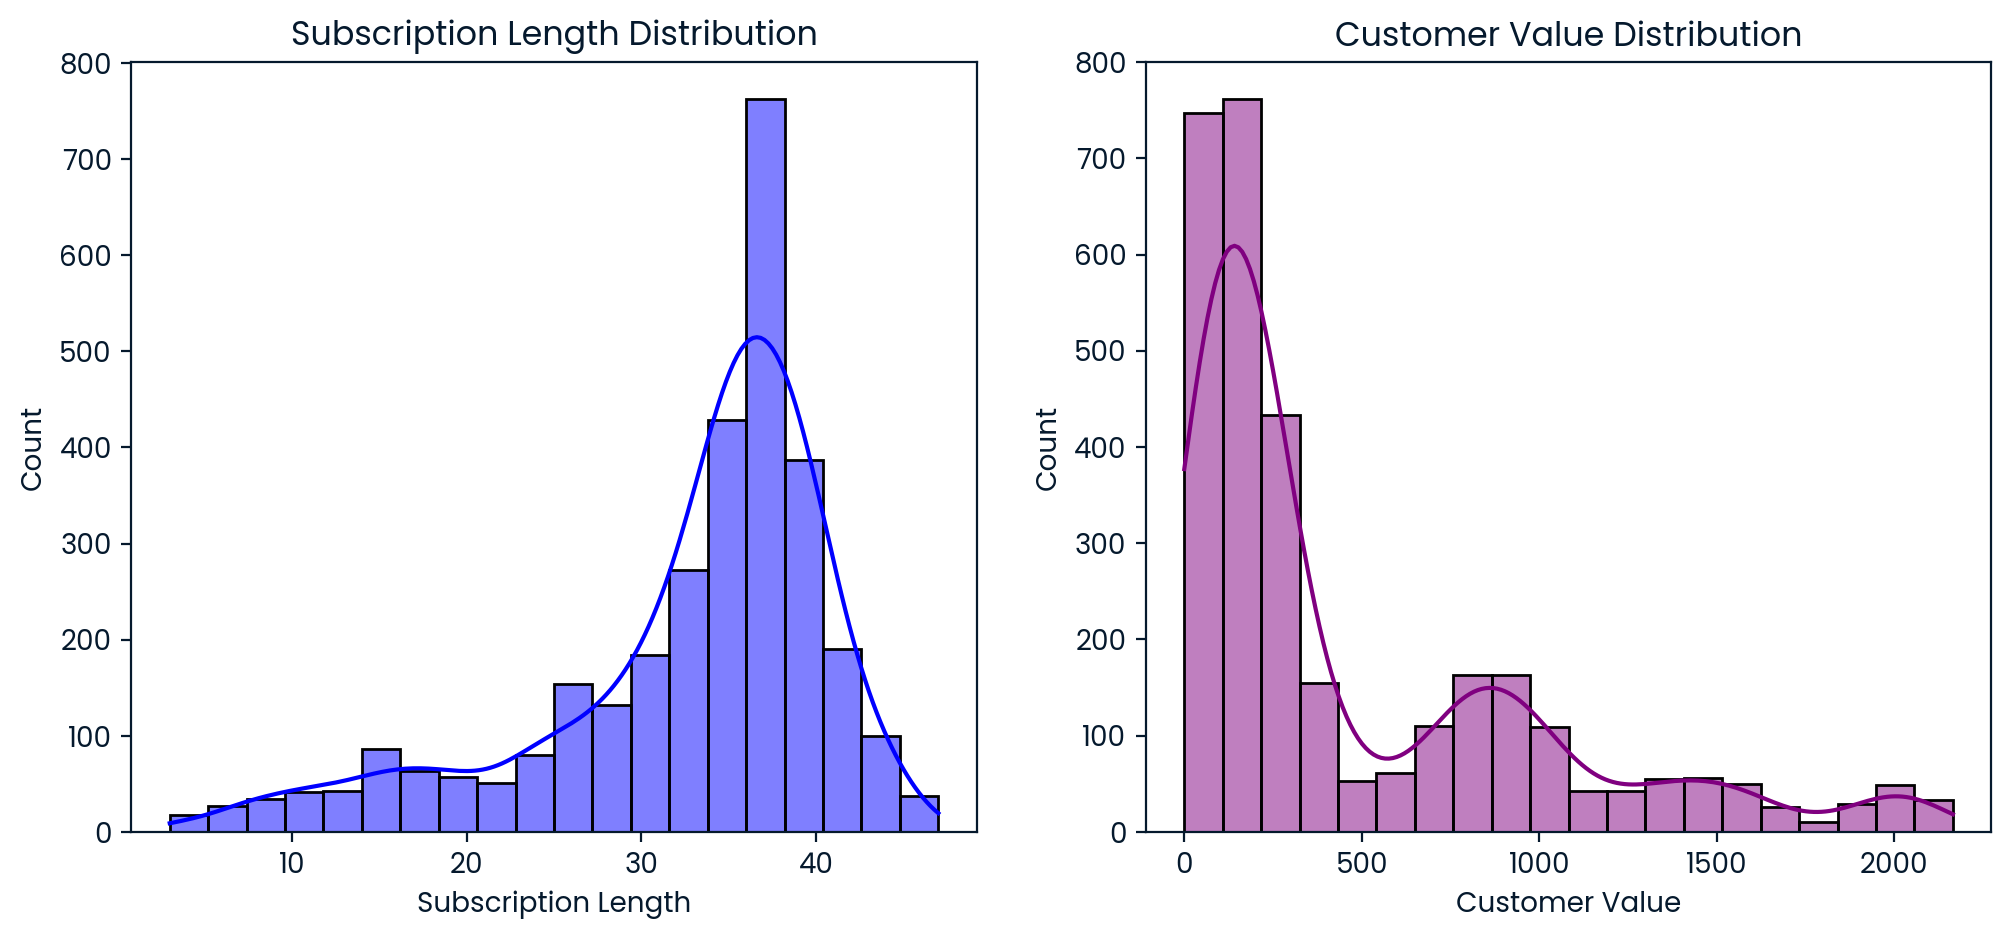

In [11]:
plt.figure(figsize=(12,5))


plt.subplot(1,2,1)
sns.histplot(df["Subscription Length"], bins=20, kde=True, color="blue")
plt.title("Subscription Length Distribution")


plt.subplot(1,2,2)
sns.histplot(df["Customer Value"], bins=20, kde=True, color="purple")
plt.title("Customer Value Distribution")

plt.show()

- Longer subscriptions may indicate lower churn.
- Higher customer value may correlate with lower churn rates.

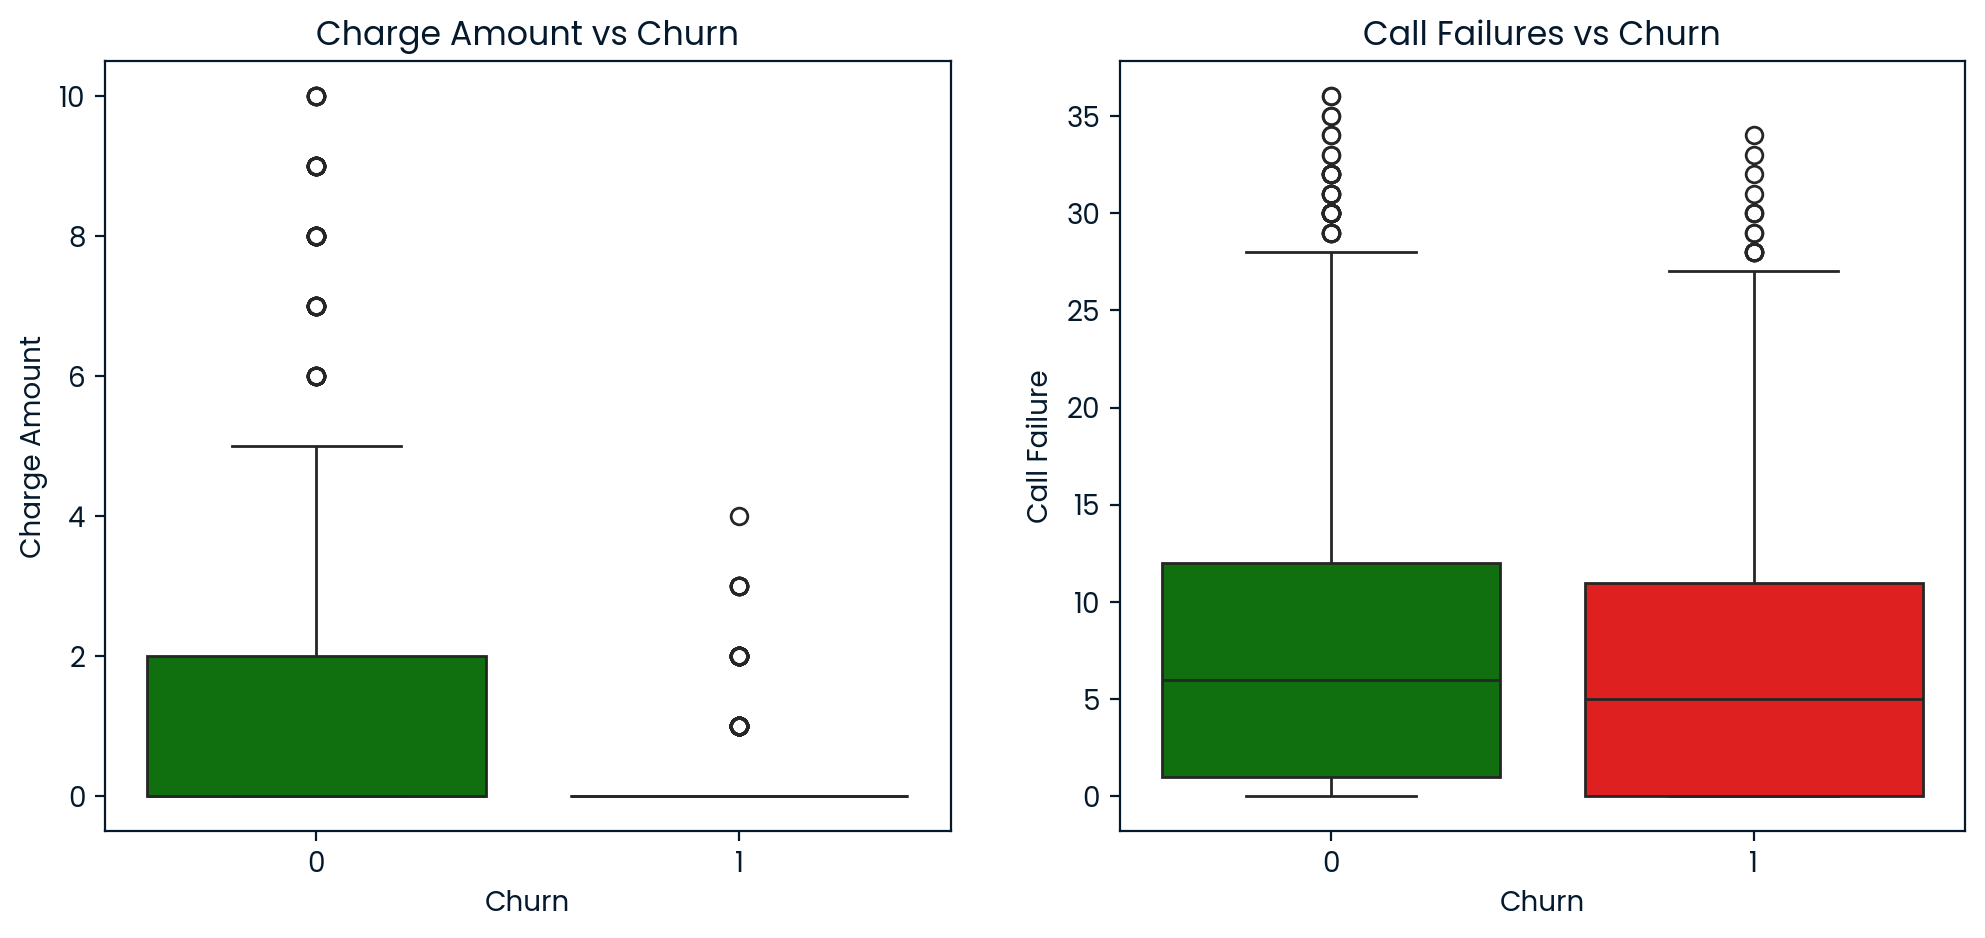

In [12]:
plt.figure(figsize=(12,5))


plt.subplot(1,2,1)
sns.boxplot(x="Churn", y="Charge Amount", data=df, palette=["green", "red"])
plt.title("Charge Amount vs Churn")


plt.subplot(1,2,2)
sns.boxplot(x="Churn", y="Call Failure", data=df, palette=["green", "red"])
plt.title("Call Failures vs Churn")

plt.show()

- Higher call failures might lead to higher churn.
- Customers with lower charge amounts might be more likely to churn.

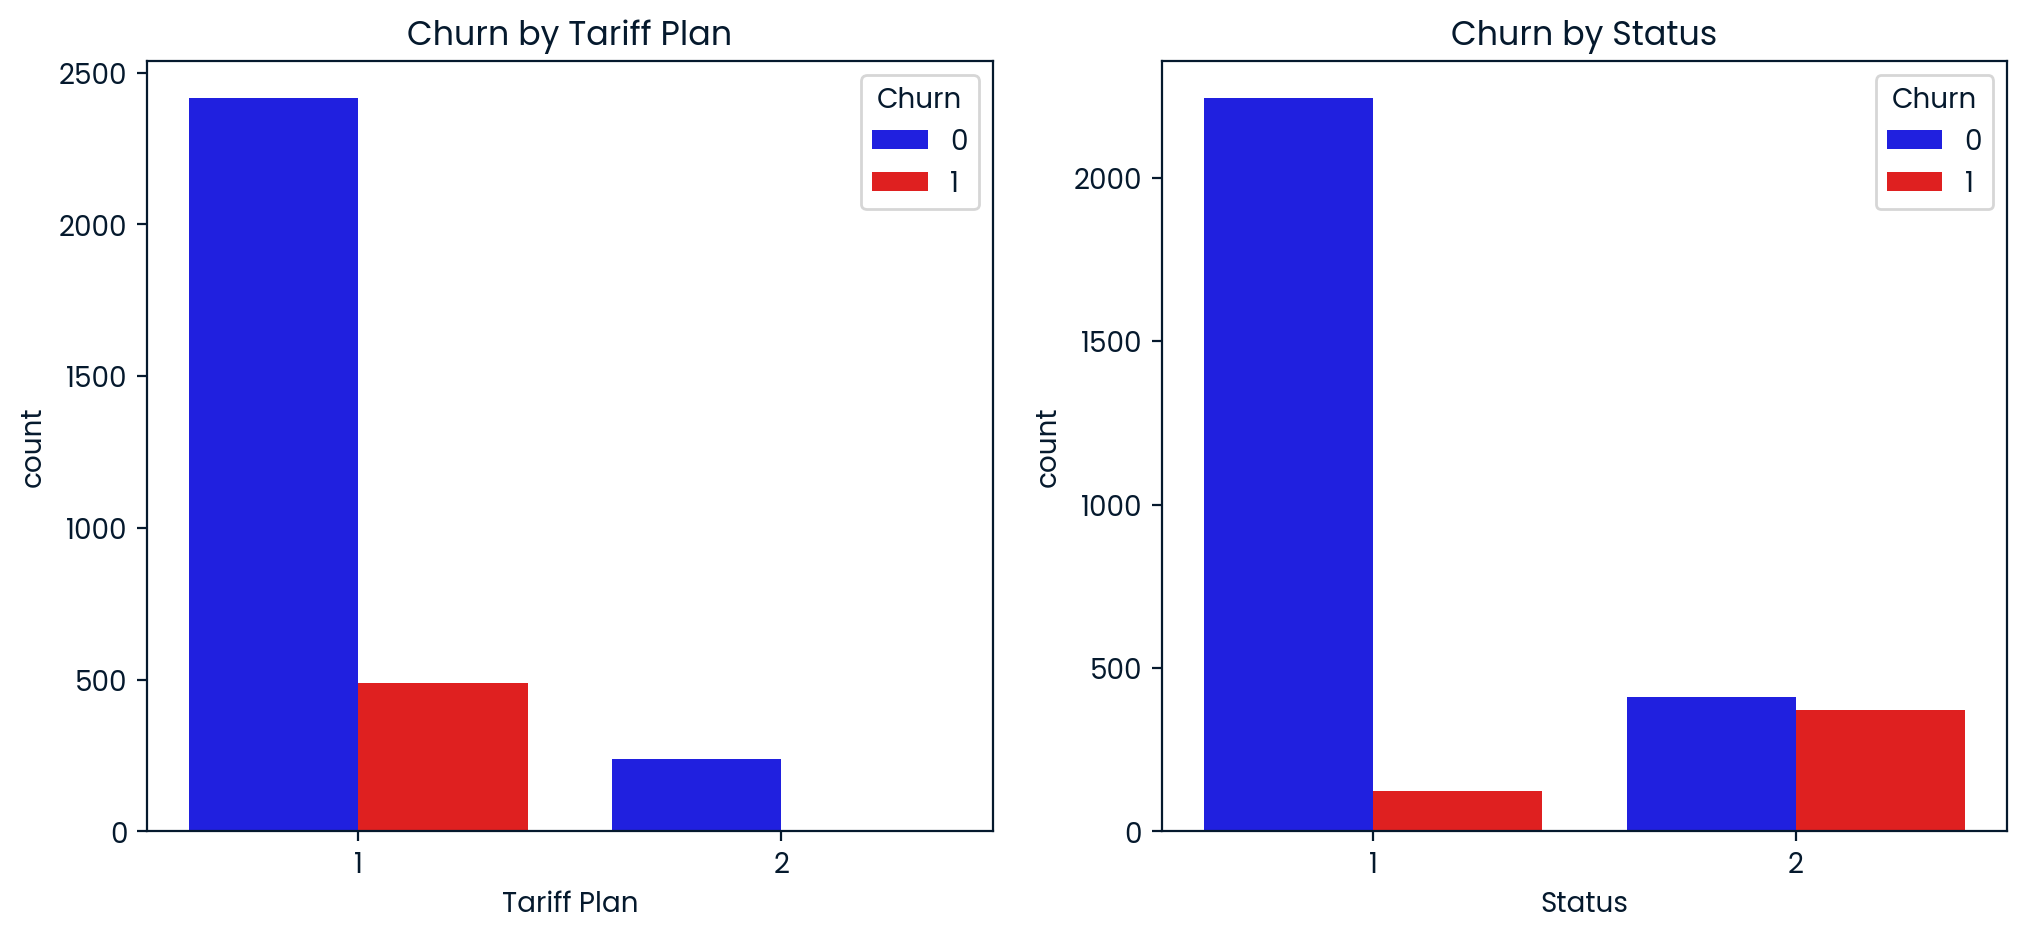

In [13]:
plt.figure(figsize=(12,5))

# Tariff Plan vs Churn
plt.subplot(1,2,1)
sns.countplot(x="Tariff Plan", hue="Churn", data=df, palette=["blue", "red"])
plt.title("Churn by Tariff Plan")

# Status vs Churn
plt.subplot(1,2,2)
sns.countplot(x="Status", hue="Churn", data=df, palette=["blue", "red"])
plt.title("Churn by Status")

plt.show()

- Prepaid (Pay-as-you-go) customers might churn more than contract customers.
- Non-active users are expected to churn at a higher rate

#  Step 3: Data Cleaning & Preprocessing

Convert Categorical Features



In [14]:

df["Tariff Plan"] = df["Tariff Plan"].map({1: "Pay as you go", 2: "Contractual"})
df["Status"] = df["Status"].map({1: "Active", 2: "Non-active"})

df = pd.get_dummies(df, drop_first=True)


In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.drop(columns=["Churn"])), columns=df.columns[:-1])
df_scaled["Churn"] = df["Churn"]


#  Step 4: Model Training

Train-Test Split


In [16]:
from sklearn.model_selection import train_test_split

X = df.drop("Churn", axis=1)
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Train Random Forest



In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9380952380952381
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       520
           1       0.86      0.77      0.81       110

    accuracy                           0.94       630
   macro avg       0.91      0.87      0.89       630
weighted avg       0.94      0.94      0.94       630



#  Step 5: Model Optimization

Hyperparameter Tuning

In [18]:
from sklearn.model_selection import GridSearchCV

param_grid = {"n_estimators": [50, 100, 200], "max_depth": [None, 10, 20]}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': 20, 'n_estimators': 100}


In [28]:

best_params = grid_search.best_params_
model_optimized = RandomForestClassifier(**best_params, random_state=42)
model_optimized.fit(X_train, y_train)

y_pred_optimized = model_optimized.predict(X_test)

accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
classification_report_optimized = classification_report(y_test, y_pred_optimized)
print(classification_report_optimized)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       520
           1       0.86      0.78      0.82       110

    accuracy                           0.94       630
   macro avg       0.91      0.88      0.89       630
weighted avg       0.94      0.94      0.94       630

